In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
from iminuit import Minuit
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *
from ExternalFunctions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
parent_path = '../../../../'
path_S1 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_S2 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 2/'

NS1 = read_SMPS(path_S1, parent_path, [-1, 0])
OPS1 = read_OPS(path_S1+'OPS/', parent_path, 0)
NS2 = read_SMPS(path_S2, parent_path, [-1, 0])
OPS2 = read_OPS(path_S2+'OPS/', parent_path, 0)

NS1_bg_mean, NS1_bg_std, NS1_bg_error = bin_mean(['2024-12-06 11:05:00', '2024-12-06 11:45:00'], NS1['2024-12-06_NanoScan'], 
                                                 NS1['2024-12-06_NanoScan'].keys()[3:16].to_list(), 'Time', 0.1)

for i, bin in enumerate(NS1['2024-12-06_NanoScan'].keys()[3:16].to_list()):
    NS1['2024-12-09_NanoScan'][bin] = NS1['2024-12-09_NanoScan'][bin] - NS1_bg_mean[i]

NS2_bg_mean, NS2_bg_std, NS2_bg_error = bin_mean(['2024-12-06 11:05:00', '2024-12-06 11:45:00'], NS2['2024-12-06_NanoScan'], 
                                                 NS2['2024-12-06_NanoScan'].keys()[3:16].to_list(), 'Time', 0.1)
for i, bin in enumerate(NS2['2024-12-06_NanoScan'].keys()[3:16].to_list()):
    NS2['2024-12-06_NanoScan'][bin] = NS2['2024-12-06_NanoScan'][bin] - NS2_bg_mean[i]

OPS_df = pd.DataFrame({'OPS1': OPS1['OPS1-lab']['Total Conc'], 
                       'OPS2': OPS2['OPS2-lab']['Total Conc']})

start, end = pd.to_datetime('2024-12-09 10:52'), pd.to_datetime('2024-12-09 11:31')
NS1_mask = (NS1['2024-12-09_NanoScan']['Time'] >= start) & (NS1['2024-12-09_NanoScan']['Time'] <= end)
NS2_mask = (NS2['2024-12-09_NanoScan']['Time'] >= start) & (NS2['2024-12-09_NanoScan']['Time'] <= end)

NS_dict = {'NS1': NS1['2024-12-09_NanoScan'][NS1_mask].reset_index(drop=True),
           'NS2': NS2['2024-12-09_NanoScan'][NS2_mask].reset_index(drop=True)}

NS_df = pd.DataFrame({'NS1': NS_dict['NS1'].iloc[:,3:16].sum(axis = 1),
                      'NS2': NS_dict['NS2'].iloc[:,3:16].sum(axis = 1)})

OPS: f(x)=0.9237190386378061x+0.5043432722669445, R2=0.983696478608852
NanoScan: f(x)=0.48887011590626883x+7091.396989523006, R2=0.11839544699008768


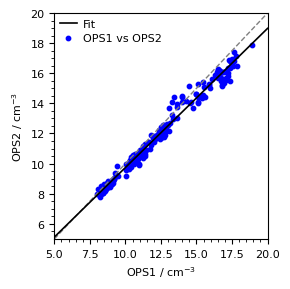

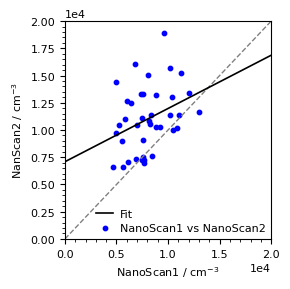

In [3]:
x_plot_OPS = np.linspace(5, 20, 100)
x_plot_NS = np.linspace(0, 20000, 100)

fig_OPS, ax_OPS = plt.subplots(figsize = (3,3))
fig_NS, ax_NS = plt.subplots(figsize = (3,3))

fit_params_OPS, squares_OPS, ndof_OPS, R2_OPS = plot_reference(ax_OPS, x_plot_OPS, OPS_df, ['OPS1', 'OPS2'], ['OPS1', 'OPS2'], linear, False)
fit_params_NS, squares_NS, ndof_NS, R2_NS = plot_reference(ax_NS, x_plot_NS, NS_df, ['NS1', 'NS2'], ['NanoScan1', 'NanoScan2'], linear, False)

print(f'OPS: f(x)={fit_params_OPS[0]}x+{fit_params_OPS[1]}, R2={R2_OPS}')
print(f'NanoScan: f(x)={fit_params_NS[0]}x+{fit_params_NS[1]}, R2={R2_NS}')

ax_OPS.set(xlabel = 'OPS1 / cm$^{-3}$', ylabel = 'OPS2 / cm$^{-3}$')
ax_NS.set(xlabel = 'NanoScan1 / cm$^{-3}$', ylabel = 'NanScan2 / cm$^{-3}$')

fig_OPS.tight_layout()
fig_NS.tight_layout()

fig_OPS.savefig('OPS_correlation.png', dpi = 600)
fig_NS.savefig('NS_correlation.png', dpi = 600)